In [11]:
import ta.historical_strategy_performance as hsp
hsp.get_strategy_class_historical_pnls()

,vcs,futures_butterfly,delta,spread_carry,ocs,scv,auxhedger,optionInventory,discretionary,total
settle_date,,,,,,,,,,
20200110,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
20200113,125.0,-6513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6388.0
20200114,250.0,9903.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10153.0
20200115,94.0,-4274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4180.0
20200116,469.0,-15879.0,-139.0,-707.0,0.0,0.0,0.0,0.0,0.0,-16256.0
...,...,...,...,...,...,...,...,...,...,...
20210422,-18268.0,-8163.0,-15.0,434.0,462.0,0.0,0.0,0.0,0.0,-25550.0
20210423,-15128.0,-2103.0,-114.0,-4563.0,-1643.0,-313.0,0.0,0.0,0.0,-23864.0
20210426,-24530.0,-3049.0,64.0,5174.0,-1084.0,-294.0,0.0,0.0,0.0,-23719.0


In [5]:
import get_price.get_futures_price as gfp
output = gfp.get_futures_price_preloaded(ticker='SBV2021',settle_date_from=20210419,settle_date_to=20210423)
output[['close_price','volume','settle_date']]

,close_price,volume,settle_date
84974,16.16,22586.0,2021-04-19
84975,16.58,38973.0,2021-04-20
84976,16.72,25645.0,2021-04-21
84977,16.76,20947.0,2021-04-22
84978,16.80,22559.0,2021-04-23


In [1]:
import quandl as qndl
qndl.get("SRF/ICE_SBV2021", authtoken="zwBtPkKDycmg5jmYvK_s")

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
Date,,,,,,
2018-11-01,14.01,14.01,14.01,14.01,NaN,NaN
2018-11-02,14.31,14.31,14.31,14.31,NaN,NaN
2018-11-05,14.13,14.13,14.13,14.13,NaN,NaN
2018-11-06,14.03,14.03,14.03,14.03,NaN,NaN
2018-11-07,14.04,14.04,14.04,14.04,NaN,NaN
...,...,...,...,...,...,...
2021-04-19,16.39,16.47,16.12,16.16,22586.0,176791.0
2021-04-20,16.20,16.66,16.20,16.58,38973.0,178250.0
2021-04-21,16.51,16.75,16.44,16.72,25645.0,177375.0


In [2]:
import quandl_data.get_data_quandl as gdq
quandl_out = gdq.get_daily_historic_data_quandl(ticker='SBV2021',date_to=20210423,date_from=20210419)
quandl_out['data_out']

,Open,High,Low,Settle,Change,Wave,Volume,Open Interest,EFP Volume,EFS Volume,Block Volume
Date,,,,,,,,,,,
2021-04-19,16.39,16.47,16.12,16.16,-0.27,None,22586.0,176791.0,None,None,None
2021-04-20,16.20,16.66,16.20,16.58,0.42,None,38973.0,178250.0,None,None,None
2021-04-21,16.51,16.75,16.44,16.72,0.14,None,25645.0,177375.0,None,None,None
2021-04-22,16.64,16.87,16.61,16.76,0.04,None,20947.0,176235.0,None,None,None
2021-04-23,16.73,16.92,16.68,16.80,0.04,None,22559.0,176633.0,None,None,None


In [4]:
import formats.futures_strategy_formats as fsf
import formats.strategy_followup_formats as sff
import formats.risk_pnl_formats as rpf
import my_sql_routines.futures_price_loader as fpl
import my_sql_routines.my_sql_utilities as msu
import get_price.presave_price as pp
import opportunity_constructs.futures_butterfly as fb
import opportunity_constructs.overnight_calendar_spreads as ocs
import contract_utilities.expiration as exp
import ta.prepare_daily as prep
import ta.underlying_proxy as up
import fundamental_data.cot_data as cot
import datetime as dt
import ta.email_reports as er

con = msu.get_my_sql_connection()

report_date = exp.doubledate_shift_bus_days()

er.send_followup_report(report_date=report_date)

up.generate_underlying_proxy_report(report_date=report_date, con=con)

In [4]:
import formats.futures_strategy_formats as fsf
import formats.strategy_followup_formats as sff
import formats.risk_pnl_formats as rpf
import my_sql_routines.futures_price_loader as fpl
import my_sql_routines.my_sql_utilities as msu
import get_price.presave_price as pp
import opportunity_constructs.futures_butterfly as fb
import opportunity_constructs.overnight_calendar_spreads as ocs
import contract_utilities.expiration as exp
import ta.prepare_daily as prep
import ta.underlying_proxy as up
import fundamental_data.cot_data as cot
import datetime as dt
import ta.email_reports as er

con = msu.get_my_sql_connection()

fpl.update_futures_price_database(con=con)

No : 0, LNG2022 loaded
Error Loading CME/LNG2023: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 1, LNG2023 loaded
No : 2, LNJ2021 loaded
No : 3, LNJ2022 loaded
No : 4, LNK2021 loaded
No : 5, LNK2022 loaded
No : 6, LNM2021 loaded
No : 7, LNM2022 loaded
No : 8, LNN2021 loaded
No : 9, LNN2022 loaded
No : 10, LNQ2021 loaded
No : 11, LNQ2022 loaded
No : 12, LNV2021 loaded
Error Loading CME/LNV2022: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 13, LNV2022 loaded
No : 14, LNZ2021 loaded
Error Loading CME/LNZ2022: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 15, LNZ2022 loaded
No : 16, LCG2022 loaded
Error Loading CME/LCG2023: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 17, LCG2023 loaded
No : 18, LCJ2021 loaded
No : 19, LCJ2022 loaded
No : 20, LCM2021 loaded
No : 21, LCM2022 loaded
No : 22, LCQ2021 loaded
No : 23, LCQ2022 loaded
No : 24, LCV2021 loaded
Error Loading CME/LCV2022: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 25, LCV2022 loa

No : 291, NGV2022 loaded
No : 292, NGX2021 loaded
No : 293, NGX2022 loaded
No : 294, NGZ2021 loaded
No : 295, NGZ2022 loaded
Error Loading CME/EDF2022: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 296, EDF2022 loaded
Error Loading CME/EDF2023: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 297, EDF2023 loaded
Error Loading CME/EDF2024: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 298, EDF2024 loaded
Error Loading CME/EDF2025: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 299, EDF2025 loaded
Error Loading CME/EDG2022: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 300, EDG2022 loaded
Error Loading CME/EDG2023: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 301, EDG2023 loaded
Error Loading CME/EDG2024: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 302, EDG2024 loaded
Error Loading CME/EDG2025: <class 'quandl.errors.quandl_error.NotFoundError'>
No : 303, EDG2025 loaded
No : 304, EDH2022 loaded
No : 305, EDH2023 loaded
N

In [1]:
import opportunity_constructs.futures_butterfly as fb
import formats.futures_strategy_formats as fsf

report_date = 20210401
fb.generate_futures_butterfly_sheet_4date(date_to=report_date)
fsf.generate_futures_butterfly_formatted_output()

In [14]:
import fundamental_data.cot_data as cot
cot.get_cot_data(ticker_head='C')

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short,settle_date
0,2148240.0,359129.0,34420.0,310925.0,844897.0,949297.0,1514950.0,1294640.0,633288.0,853597.0,1995-04-18
1,2104740.0,368216.0,30802.0,299233.0,802670.0,950956.0,1470120.0,1280990.0,634626.0,823753.0,1995-04-25
2,2168500.0,418607.0,21575.0,335904.0,795134.0,989832.0,1549640.0,1347310.0,618857.0,821191.0,1995-05-02
3,2210640.0,425136.0,25560.0,353612.0,794552.0,994515.0,1573300.0,1373690.0,637341.0,836954.0,1995-05-09
4,2244240.0,401699.0,30373.0,358588.0,830877.0,1006420.0,1591160.0,1395380.0,653082.0,848862.0,1995-05-16
...,...,...,...,...,...,...,...,...,...,...,...
1349,2462699.0,580165.0,75768.0,623441.0,1035727.0,1524015.0,2239334.0,2223224.0,223365.0,239475.0,2021-02-23
1350,2358552.0,550839.0,74324.0,573159.0,1019683.0,1485640.0,2143682.0,2133124.0,214871.0,225429.0,2021-03-02
1351,2374719.0,551664.0,79958.0,583661.0,1021511.0,1484026.0,2156836.0,2147646.0,217883.0,227073.0,2021-03-09
1352,2389663.0,550925.0,74143.0,596120.0,1028998.0,1489985.0,2176043.0,2160248.0,213620.0,229415.0,2021-03-16


In [10]:
import opportunity_constructs.futures_medium as fm
fm.generate_fm_sheet_4date(date_to=20210330)

LN
W
NQ
JY
SM
CL
BO
HO
ED
S
CC
TY
ES
NG
TU
SI
KC
BP
CD
EC
LC
AD
SB
CT
C
FC
KW
OJ
GC
RB
US
FV


{'futures':      ticker tickerHead  comm_indx_156  spec_indx_156  small_indx_156  \
 0   LNN2021         LN       8.221732      93.957033       59.240165   
 1    WN2021          W      29.770374      72.640242       45.189437   
 2   NQU2021         NQ      39.041256      67.306347       29.858891   
 3   JYU2021         JY      70.366513      35.758663       18.006819   
 4   SMN2021         SM      34.657585      59.716085       80.492073   
 5   CLN2021         CL      36.521047      53.353668       95.851698   
 6   BON2021         BO      12.995855      83.694389       93.164389   
 7   HOM2021         HO      47.194362      45.443263       71.035932   
 8   EDM2023         ED      20.906078      79.128791       62.689190   
 9    SN2021          S      18.184028      80.540414       73.068323   
 10  CCN2021         CC      30.324205      68.215198       63.678084   
 11  TYU2021         TY      38.890536      78.048392       30.864019   
 12  ESU2021         ES      41.595288  

In [14]:
import futures_charts.outright_charts as oc
import fundamental_data.cot_data as cot
output = oc.get_outright_chart(ticker_head='C',date_from=20150101,date_to=20210426,signal_list=['comm_indx_156','ma52'])
# comm_indx_156 willco


In [3]:
data_out['Commercial Long']-data_out['Commercial Short']

0      -41592.0
1      -38800.0
2      -77881.0
3      -83557.0
4     -111821.0
         ...   
241      2043.0
242      1156.0
243      1261.0
244     -3350.0
245     -4604.0
Length: 245, dtype: float64

In [18]:
cot_output = cot.get_cot_data(ticker_head='W', date_to=20000101)
import datetime as dt
cot_output
cot_output['settle_date'] = [x+dt.timedelta(days=3) for x in cot_output['settle_date']]

cot_output







,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short,settle_date
0,409314.0,96213.0,31348.0,75478.0,105022.0,146614.0,276713.0,253440.0,132600.0,155873.0,1995-04-21
1,380710.0,86582.0,20379.0,67495.0,97209.0,136009.0,251285.0,223883.0,129425.0,156827.0,1995-04-28
2,414167.0,123871.0,19264.0,75207.0,81745.0,159626.0,280823.0,254097.0,133345.0,160070.0,1995-05-05
3,436520.0,128401.0,18528.0,78904.0,95146.0,178703.0,302452.0,276136.0,134068.0,160384.0,1995-05-12
4,469269.0,146095.0,16879.0,72218.0,107129.0,218950.0,325442.0,308046.0,143827.0,161222.0,1995-05-19
...,...,...,...,...,...,...,...,...,...,...,...
241,157809.0,14679.0,31209.0,29189.0,63800.0,61757.0,107669.0,122156.0,50140.0,35653.0,1999-12-03
242,156233.0,14371.0,32508.0,27504.0,66673.0,65517.0,108549.0,125530.0,47684.0,30703.0,1999-12-10
243,157200.0,13900.0,30247.0,28125.0,68259.0,66998.0,110284.0,125369.0,46916.0,31830.0,1999-12-17
244,148301.0,16844.0,27757.0,25139.0,63971.0,67321.0,105955.0,120218.0,42346.0,28083.0,1999-12-24


In [2]:
import opportunity_constructs.cot_strategy as cs
output = cs.get_cot_sheet_4date(date_to=20200922)
cot_sheet = output['cot_sheet']

# C might be a good pullback buy
# NGX look for a bearish pattern, CL needs  a trendline break

In [5]:
combined_data['Open Interest']

719     1695309.0
720     1680129.0
721     1788203.0
722     1848987.0
723     1993277.0
          ...    
1214    3934637.0
1215    3704481.0
1216    3915969.0
1217    3855656.0
1218    3852315.0
Name: Open Interest, Length: 500, dtype: float64

Index(['settle_date', 'tr_dte_x', 'close_price_x', 'tr_dte_y', 'close_price_y',
       'ticker', 'change_1', 'const_mat', 'Open Interest',
       'Noncommercial Long', 'Noncommercial Short', 'Noncommercial Spreads',
       'Commercial Long', 'Commercial Short', 'Total Long', 'Total Short',
       'Nonreportable Positions Long', 'Nonreportable Positions Short',
       'comm_net', 'spec_net', 'comm_min', 'comm_max', 'cot_index',
       'comm_min6m', 'comm_max6m', 'cot_index_6m', 'comm_net_normalized',
       'comm_min_fast', 'comm_max_fast', 'cot_index_fast', 'ma52'],
      dtype='object')


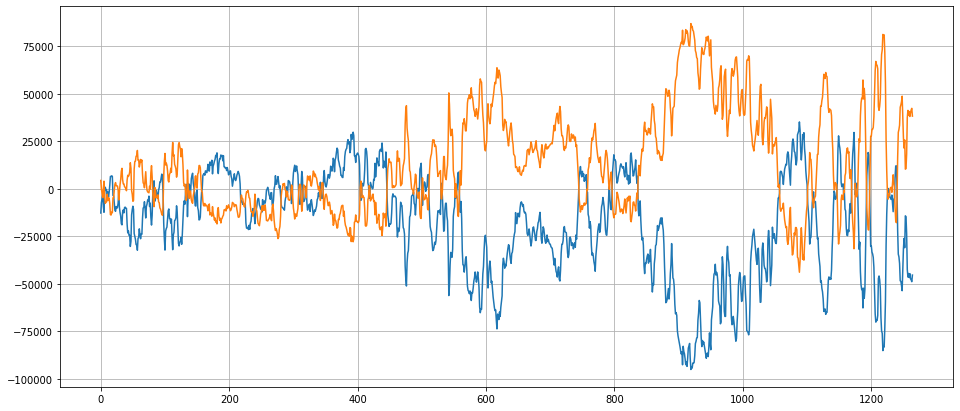

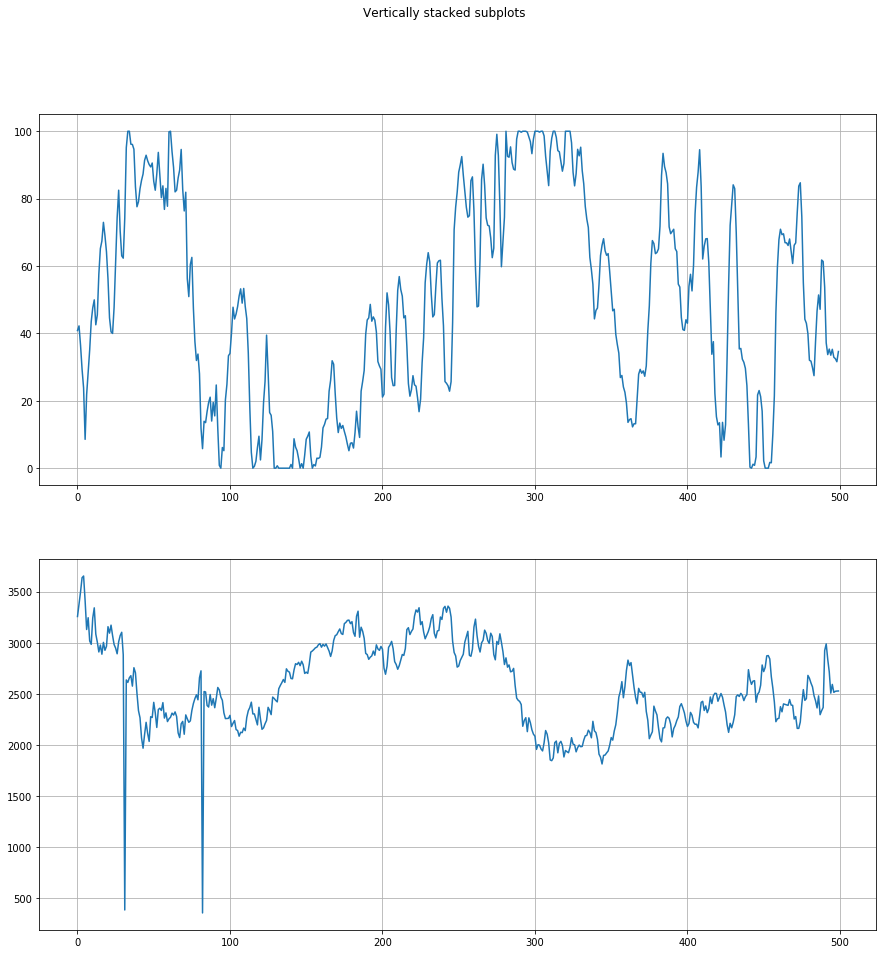

In [5]:
import signals.futures_directional_signals as fds
output = fds.get_cot_strategy_signals(ticker_head='CC',date_to=20210201)
combined_data = output['combined_data']
print(combined_data.columns)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 7))
plt.plot(range(len(combined_data.index)),combined_data['comm_net'],
         range(len(combined_data.index)),combined_data['spec_net'])
plt.grid()            
plt.show()

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,15))
fig.suptitle('Vertically stacked subplots')

combined_data = combined_data.iloc[-500:]
ax1.plot(range(len(combined_data.index)),combined_data['cot_index'])
ax1.grid()
ax2.plot(range(len(combined_data.index)),combined_data['const_mat'])
ax2.grid()

In [15]:


import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()

In [18]:
# Create DB Strategy

import ta.strategy as ts
ts.generate_db_strategy_from_strategy_sheet(id=20,strategy_class='futures_butterfly',report_date=report_date)

C:\Users\mtulum\Anaconda3\lib\site-packages\pandas\core\series.py:1152: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



{'alias': 'FCV2021X2021X2021F2022', 'strategy_id': 703}

In [2]:
# Create Misc Strategy
import ta.strategy as ts
alias= 'SH2022_long_scv'
#description_string = 'strategy_class=optionInventory'
#description_string = 'strategy_class=vcs&betsize=42115'
#description_string = 'strategy_class=delta'
description_string = 'strategy_class=scv&betsize=8422'
#description_string = 'strategy_class=discretionary'
#description_string = 'strategy_class=vcs&betsize=42115'
output = ts.generate_db_strategy_from_alias(alias=alias,description_string=description_string)
output

{'alias': 'SH2022_long_scv', 'strategy_id': 698}

In [13]:
import ta.trade_fill_loader2 as tfl
import datetime as dt
#wuhu = tfl.assign_trades_2strategies(trade_source='tt')
#wuhu

#tfl.load_tt_trades(tags2exclude=['ifs','ocs','sc','DeltaHedge'])     # 'DeltaHedge','ocs','sc'

tfl.load_tagged_tt_trades()
#tfl.load_cme_direct_trades()
#tfl.load_manual_entry_trades()
#wuhu = tfl.get_formatted_tt_fills()
#wuhu['aggregate_trades']

#tfl.load_latest_tt_fills()
#dt.datetime.strptime(wuhu['Contract'].values[40],'%y-%b')


#tfl.load_cme__fills()
#wuhu = tfl.get_formatted_cme_direct_fills()
#wuhu['aggregate_trades']

Need to create LNN2021_LNQ2021_ocs
Need to create SBH2022_SBK2022_ocs


In [19]:
import ta.trade_fill_loader2 as tfl
tfl.load_tagged_tt_trades()

Need to create CLJ2022_CLK2022_ocs


In [3]:
import ta.trade_fill_loader as tfl
wuhu = tfl.get_formatted_manual_entry_fills(tags2exclude=['ifs','sc','ocs','DeltaHedge'])
wuhu

,ticker,option_type,strike_price,trade_price,trade_quantity
0,SU2016,P,1040,24.875,5
1,SU2016,C,1040,90.625,5
2,SX2016,P,1020,32.250,-5
3,SX2016,C,1020,97.250,-5


In [23]:
import ta.trade_fill_loader2 as tfl
assign_output = tfl.get_tagged_tt_fills()
assign_output['aggregate_trades']

,ticker,option_type,strike_price,trade_price,trade_quantity,instrument,real_tradeQ,alias
0,KCU2020,None,None,100.050000,93.0,F,True,spreadCarryJun20
1,KCZ2020,None,None,102.500000,-93.0,F,True,spreadCarryJun20
2,CH2021,None,None,344.265306,49.0,F,True,CZ2020_CH2021_ocs
3,CZ2020,None,None,333.515306,-49.0,F,True,CZ2020_CH2021_ocs
4,SMH2021,None,None,290.419149,-47.0,F,True,SMH2021_SMK2021_ocs
5,SMK2021,None,None,291.104255,47.0,F,True,SMH2021_SMK2021_ocs
6,BOF2021,None,None,28.749500,160.0,F,True,BOZ2020_BOF2021_ocs
7,BOZ2020,None,None,28.549500,-160.0,F,True,BOZ2020_BOF2021_ocs
8,WH2021,None,None,502.000000,6.0,F,True,WH2021_WK2021_ocs_3
9,WK2021,None,None,507.750000,-6.0,F,True,WH2021_WK2021_ocs_3


In [8]:

#Daily Hedge

import ta.strategy_hedger as sh
import shared.calendar_utilities as cu
import ta.strategy as tas
#sh.strategy_hedge_report(delta_alias='delta_aug19')
import ta.strategy as tas

wuhu  = tas.get_net_position_4strategy_alias(alias='ESH2021_longNov20',as_of_date=cu.get_doubledate())
wuhu



,ticker,option_type,strike_price,instrument,qty
0,ESH2021,None,NaN,F,1.0


In [7]:
import ta.strategy_greeks as sg
import pandas as pd
import get_price.get_options_price as gop
output = sg.get_greeks_4strategy_4date(alias='LNG21Z20VCS')

# SIU16Z16VCS
output['ticker_portfolio']
#output['strike_portfolio']
# 2.6/ -5.2
# 3/-6
#output['strike_portfolio']

# silver portfolio might cause problems
#output

# Z7 vol from 29.15 to 27.6
# to 29.6 to 28
output['ticker_portfolio']
output['ticker_portfolio']
print(output['strike_portfolio']['total_oev'].sum())
output['ticker_portfolio']
output['strike_portfolio']

18.149283627149316


,ticker,option_type,strike_price,instrument,qty,theta,vega,delta,delta_diff,oev,total_oev,dollar_theta,dollar_vega
0,LNG2021,C,58.0,O,27.0,-0.013960,11.189374,0.808261,0.308261,0.682561,18.429158,-150.765516,1208.452362
1,LNG2021,C,60.0,O,50.0,-0.015518,12.672285,0.762856,0.262856,0.773020,38.651013,-310.351000,2534.456972
2,LNG2021,P,58.0,O,27.0,-0.013983,11.178142,-0.190598,0.690598,0.681876,18.410659,-151.014456,1207.239326
3,LNG2021,P,60.0,O,50.0,-0.015540,12.666379,-0.236115,0.736115,0.772660,38.632999,-310.790200,2533.275736
0,LNZ2020,C,50.0,O,-50.0,-0.013570,4.815089,0.903674,0.403674,0.426848,-21.342393,271.398800,-963.017746
1,LNZ2020,C,52.0,O,-50.0,-0.016587,6.023643,0.868361,0.368361,0.533984,-26.699189,331.740600,-1204.728672
2,LNZ2020,P,50.0,O,-50.0,-0.013576,4.800192,-0.095477,0.595477,0.425527,-21.276365,271.528600,-960.038398
3,LNZ2020,P,52.0,O,-50.0,-0.016601,6.014034,-0.130889,0.630889,0.533132,-26.656598,332.014200,-1202.806830


In [14]:
import ta.strategy_hedger as sh
sh.get_hedge_4strategy(alias='SIN17U17VCS')

,underlying_ticker,hedge_price,option_delta,underlying_delta,total_delta,hedge
0,SIN2017,18.0775,4.90,-5.10,-0.20,0.20
1,SIU2017,18.1400,-4.76,5.13,0.37,-0.37


In [33]:
import ta.strategy as ts
ts.move_position_from_strategy_2_strategy(strategy_from='spreadCarryMar21_2',strategy_to='spreadCarryApr21_2')

In [10]:
import ta.pnl as tapnl
alias = 'BZ2022M2023M2023Z2023_4'
tapnl.close_strategy(alias=alias,broker='abn')


In [17]:

import ta.man_position_reconciler as mpr
mpr.reconcile_position()

,generalized_ticker,qty_x,ticker,option_type,strike_price,instrument,qty_y,qty_diff


In [6]:
import shared.calendar_utilities as cu
import ta.strategy as tas
wuhu  = tas.get_net_position_4strategy_alias(alias='SU2021X2021Q2021U2021_2',as_of_date=cu.get_doubledate())
wuhu

# buy SIN


,ticker,option_type,strike_price,instrument,qty
0,SQ2021,None,NaN,F,-1.0
1,SU2021,None,NaN,F,3.0
2,SX2021,None,NaN,F,-2.0


In [2]:
wuhu  = tas.get_net_position_4strategy_alias(alias='TYZ2018_short_scv')
wuhu

,ticker,option_type,strike_price,instrument,qty


In [7]:
import ta.position_close_helper as pch

#pch.calc_intrday_pnl_from_prices(alias='LNZ2020_long_scv',structure_price=10.975,LNZ2020=64.25)
#pch.calc_intrday_pnl_from_prices(alias='LCJ21G21VCS',structure_price=1.95,LCG2021=115.125,LCJ2021=118.85)
#pch.calc_intrday_pnl_from_prices(alias='WN21H21VCS',structure_price=20,WH2021=606.75,WN2021=603)
#pch.calc_intrday_pnl_from_prices(alias='LNJ21G21VCS',structure_price=2.275,LNG2021=65.975,LNJ2021=69.475)
pch.calc_intrday_pnl_from_prices(alias='LCQ21M21VCS',structure_price=0.8,LCM2021=114.4,LCQ2021=114.05)
#pch.calc_intrday_pnl_from_prices(alias='SU2021_long_scv',structure_price=153.375,SU2021=1132.75)
# sell 1 ESZ


{'structure_pnl': 3600.0000000000073,
 'futures_pnl': -2029.1999999999443,
 'structure_settle': 0.5999999999999996}

In [5]:
import ta.position_close_helper as pch
pch.calc_intrday_pnl_from_prices(alias='CZ2021_long_scv',structure_price=95.875,CZ2021=478)
# sell 2 WH futures

{'structure_pnl': 2906.25, 'futures_pnl': -861.75, 'structure_settle': 94.0}

In [6]:
0.8125*64

52.0

In [10]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['SH2021'],
                                            structure_price = 172.5,
                                            strike_list=[1060],
                                            underlying_price_list=[1228.5],
                                            qty = 10,
                                            structure_type='straddle')


# sell 2 LNM futures 

{'total_pnl': -1051.895510000002,
 'structure_pnl': -11375.0,
 'delta_pnl': 10323.104489999998,
 'structure_price_yesterday': 149.75}

In [9]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['WU2021','WZ2021'],
                                            structure_price =12.375,
                                            strike_list=[650,660],
                                            underlying_price_list=[596.75,603.75],
                                            qty =50,
                                            structure_type='straddle_spread')

{'total_pnl': 98.4672437500002,
 'structure_pnl': -312.5,
 'delta_pnl': 410.9672437500002,
 'structure_price_yesterday': 12.5}

In [8]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['LNZ2020'],
                                            structure_price =16.05,
                                            strike_list=[50],
                                            underlying_price_list=[65.4],
                                            qty =-23,
                                            structure_type='straddle')

# sell 7 ZSN futures

{'total_pnl': 213.2852790000161,
 'structure_pnl': 10349.999999999967,
 'delta_pnl': -10136.714720999951,
 'structure_price_yesterday': 17.174999999999997}

In [4]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['LNM2021','LNN2021'],
                                            structure_price =-1,
                                            strike_list=[80,82],
                                            underlying_price_list=[99.1,99.2],
                                            qty =21,
                                            structure_type='straddle_spread')

{'total_pnl': 571.9008392998944,
 'structure_pnl': -1889.9999999999764,
 'delta_pnl': 2461.9008392998708,
 'structure_price_yesterday': -0.7750000000000028}

In [28]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['ESZ2019'],
                                            structure_price =248.5,
                                            strike_list=[2890],
                                            underlying_price_list=[2888],
                                            qty =21,
                                            structure_type='straddle')

{'total_pnl': 232.20795150000004,
 'structure_pnl': 0.0,
 'delta_pnl': 232.20795150000004,
 'structure_price_yesterday': 248.5}